In [32]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [110]:
df=pd.read_csv('C:\\Users\\86746\\Desktop\\NYU\\Varun\\bus.csv',encoding='ISO-8859-1')

In [111]:
date=df['Occurred_On'].tolist()
for i in range(0,len(date)-1):
    if date[i][-2] == "AM" and date[i][11:13] == "12":
        date[i]= "00" + date[i][13:-2]
    elif date[i][-2:] == "AM":
        date[i]=date[i][:-2]
    elif date[i][-2:] == "PM" and date[i][11:13] == "12":
        date[i]=date[i][:-2]
    else:
        hour=str(int(date[i][11:13])+12) + date[i][13:-3]
        date[i]=date[i][0:11]+hour

In [112]:
df.dropna(subset=['Boro','Reason'],inplace=True)
df['Occurred_On']=pd.to_datetime(df['Occurred_On'])
df=df[df['Boro']!='All Boroughs']
df['day']=df['Occurred_On'].dt.dayofweek
df['year']=df['Occurred_On'].dt.year
df['hour']=df['Occurred_On'].dt.hour
df=df[df['day']!=6]

In [113]:
count_day = df[['day', 'Breakdown_or_Running_Late']].groupby(by='day', as_index=False).count()
count_year = df[['year', 'Breakdown_or_Running_Late']].groupby(by='year', as_index=True).count()

In [114]:
count_day.rename(columns={'Breakdown_or_Running_Late':'N_trips'}, inplace=True)

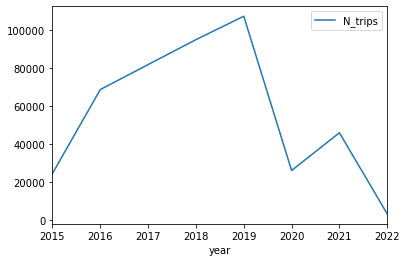

In [115]:
count_year.rename(columns={'Breakdown_or_Running_Late':'N_trips'}, inplace=True)
count_year.plot()

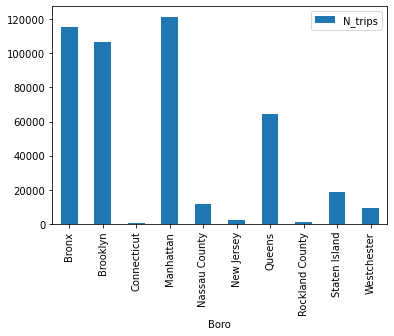

In [116]:
count_boro=df[['Boro', 'Breakdown_or_Running_Late']].groupby(by='Boro', as_index=True).count()
count_boro.rename(columns={'Breakdown_or_Running_Late':'N_trips'}, inplace=True)
count_boro.plot.bar()

In [117]:
df['hour'].unique()

array([ 8,  7, 20,  9, 11, 23, 12, 13, 14,  2, 16, 17, 18,  5,  6, 19, 15,
        1, 10, 22,  0,  3,  4, 21], dtype=int64)

In [128]:
for i in df['hour']:
    if i==23:
        i=11
    elif i==22:
        i=10
    elif i==21:
        i=9

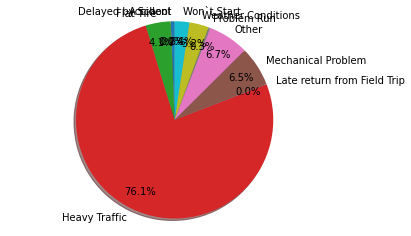

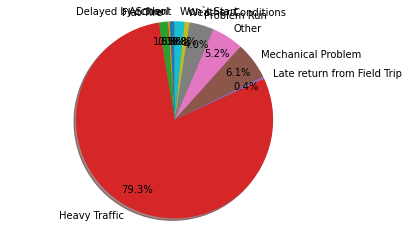

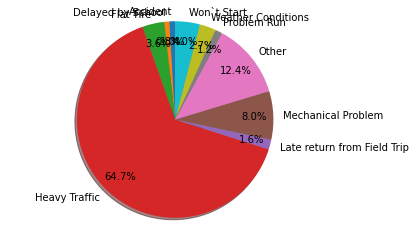

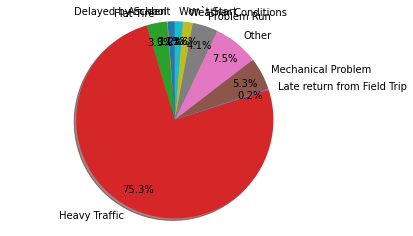

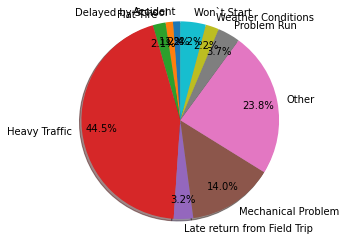

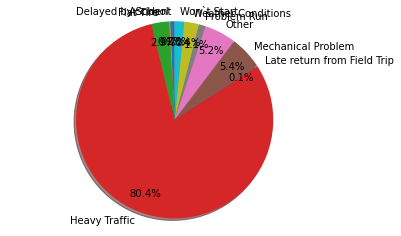

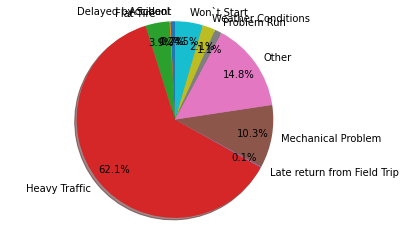

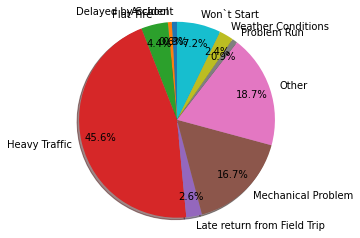

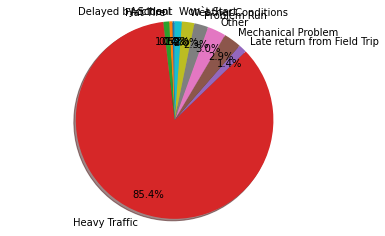

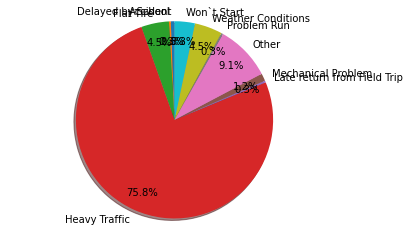

In [8]:
for i in df['Boro'].unique():
    bus=df[df['Boro']==i]
    reason = bus[['Reason', 'Breakdown_or_Running_Late']].groupby(by='Reason', as_index=False).count()
    labels = reason['Reason']
    sum1=reason.sum()
    explode=np.zeros(len(labels))
    sizes=[]
    for j in range(0,10):
        count=reason['Breakdown_or_Running_Late'][j]/sum1[1]
        sizes.append(count)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',pctdistance=0.8,
    shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.show()

In [9]:
for i in df['Boro'].unique():
    bus=df[df['Boro']==i]
    reason = bus[['Reason', 'Breakdown_or_Running_Late']].groupby(by='Reason', as_index=False).count()
    reason.rename(columns={'Breakdown_or_Running_Late':'N_trips'}, inplace=True)
    reason=reason.sort_values('N_trips',ascending=False)
    print(reason)

                        Reason  N_trips
3                Heavy Traffic     1813
6                        Other      159
5           Mechanical Problem      155
2                    Flat Tire       97
8           Weather Conditions       76
9                  Won`t Start       57
0                     Accident       15
7                  Problem Run        7
1            Delayed by School        1
4  Late return from Field Trip        1
                        Reason  N_trips
3                Heavy Traffic    96284
5           Mechanical Problem     7401
6                        Other     6336
7                  Problem Run     4881
9                  Won`t Start     1959
2                    Flat Tire     1804
8           Weather Conditions      989
0                     Accident      970
4  Late return from Field Trip      442
1            Delayed by School      344
                        Reason  N_trips
3                Heavy Traffic    74677
6                        Other    14333


In [132]:
bus_hour = df[['hour','day','Breakdown_or_Running_Late']].groupby(['hour','day'],as_index = False).count()
bus_hour.rename(columns={'Breakdown_or_Running_Late':'N_trips'}, inplace=True)

In [133]:
result=[]
for i in range(0,5):
    count=bus_hour[bus_hour['day']==i]
    count_rest=bus_hour[bus_hour['day']!=i]
    test=stats.ttest_ind(count['N_trips'],count_rest['N_trips'])
    if test[1]<0.05:
        p=True
        
    else:
        p=False
    result.append(p)

In [134]:
result

[False, False, False, False, False]